In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
pwd

u'/home/mabitbol/GBT-S140/notebooks'

In [2]:
from astropy.io import fits
import glob

In [10]:
antenna_files = glob.glob('/home/gbtdata/AGBT17A_259_02/Antenna/2017_04_05_0[89]*.fits')
antenna_files.sort()

az = []
el = []
ra = []
dec = []
dmjd = []
for fn in antenna_files:
    f = fits.open(fn)
    h = f[2]
    dmjd.extend(h.data['DMJD'])
    az.extend(h.data['MNT_AZ'])
    el.extend(h.data['MNT_EL'])
    ra.extend(h.data['RAJ2000'])
    dec.extend(h.data['DECJ2000'])
az = np.array(az)
el = np.array(el)
ra = np.array(ra)
dec = np.array(dec)
dmjd = np.array(dmjd)

In [11]:
bins_ra = np.arange(ra.min(), ra.max(), 2.5 / 60.)
bins_dec = np.arange(dec.min(), dec.max(), 2.5 / 60.)
stuff = np.histogram2d(ra, dec, bins=[bins_ra, bins_dec])
histo = stuff[0]

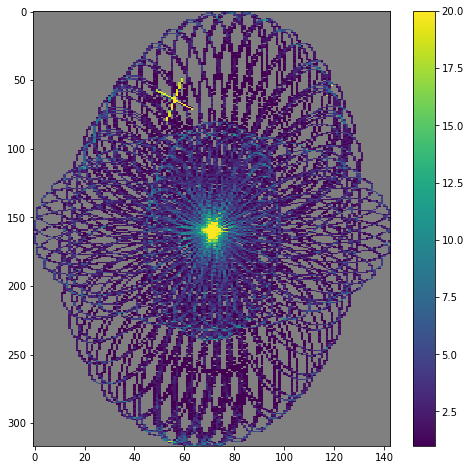

In [12]:
figure(figsize=(8, 8))
imshow(histo, cmap=cm.viridis, aspect='auto')
clim(1, 20)
grid(False)
colorbar()

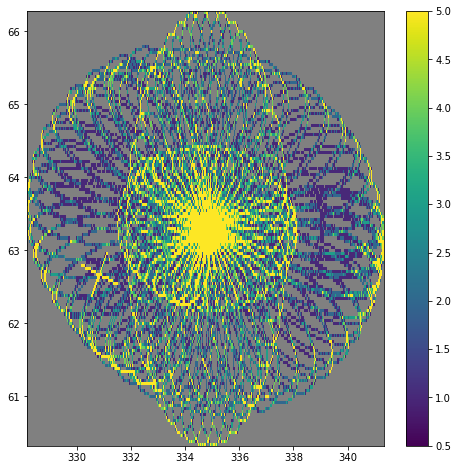

In [13]:
figure(figsize=(8, 8))
pck = pcolormesh(bins_ra, bins_dec, histo.T, cmap=cm.viridis)
pck.cmap.set_under('grey')
clim(0.5, 5)
colorbar()

In [ ]:
xx, yy = meshgrid(bins[:-1], bins[:-1])
circlemask = (xx**2 + yy**2) < (map_radius**2)
mask = histo<1.
bigmask = circlemask & mask